# Deskriptive analytics
* Description of investments in the manufacturing industry in Norway during the years before and after the financial crisis
* 17.02.2020

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


In [2]:
#Henter investdata og setter index til dato
invest = pd.read_excel('../investdata_mars2017.xlsx', sep = ',', na_values='#N/A')
invest.index = invest.dato
invest.drop('dato', 1, inplace = True)
dates = pd.date_range('19800101', periods=164, freq='Q')

#dates = pd.date_range('20130101', periods=4, freq='MS')
invest.index=dates


In [127]:
invest.head()

,K1015,K4015,K5015,K1025,K4025,K5025,K1030,K4030,K5030,K1045,K4045,K5045,JK1015,JK4015,JK5015,JK1025,JK4025,JK5025,JK1030,JK4030,JK5030,JK6015,JK6025,JK6030,JK6045,K6015,K6025,K6030,K6045,JK1045,JK4045,JK5045,DEPRATE10,DEPRATE40,DEPRATE50,DEPRATE60,PJ10,PJ40,PJ50,AVSKR10,AVSKR40,AVSKR50,AVSKR60,RNOK,RENPF300NB,RENPF300,RENPF300BO,RISIKOPR,ROMF,TRTMNW,TRTB,KPI,VX15,VX25,VX30,VX45,X15,X25,X30,X45,WW3AI,BORSI,RAM300,RD300,KURVECU,USDEUR,RUTL,UKPINY,MII,OLJEPRIS,PMET,PMAS,PX46,Q6,YE15,YE25,YE30,YE45,Y15,Y25,Y30,Y45,NFI100,YTSU15,YTSU25,YTSU30,YTSU45,URKORR,Q6.1,Y,Y66,Y65,Y90K,Y92S,Y91S,H15,H25,H30,H45,LW15,LW25,LW30,LW45,WW,WW15,WW25,WW30,WW45,YWW15,YWW25,YWW30,YWW45,VH15,VH25,VH30,VH45,TFF15,TFF25,TFF30,TFF45,TM16,TM25,TM46,TM30,YE,YE66,YE65,YEI300,YEI100,SQ6_TR,GSQ6,JK3_x,X3_x,Y15+Y25+Y30+Y45,YE15+YE25+YE30+YE45,DEPRATE50_x,TRTB_x,AVSKR50_x,PJ50_x,RNOK_x,REN100_slutt,REN100,MARGINREN100,K_ETTERSPORSEL,K_ETTERSPORSELHJEMME,K_ETTERSPORSELUTE,K_KONKHJEMME,K_KONKEU,K_KONKA.RE,K_KAPMASKIN,K_TILGANGARB,K_TILGANG,K_A.RE,K_INGEN,K_NORESPONSE,OMVF100,BG100,BG100NOK,BG100VALUTA,RENREALLONG,PBKGAMMA,JKS66,SJKS66
1980-03-31,35491.07813,2079.83288,13445.65737,51784.28032,2134.03618,24567.66604,47695.59983,101.32742,37507.16551,52752.24245,710.06072,14639.72544,531.69748,100.93746,458.41955,450.34287,96.76689,523.34064,704.58802,9.04146,803.97729,66.50200,202.50800,154.56343,552.75146,1080.99829,3075.50903,2146.68481,8530.20117,338.70182,31.07854,322.91255,0.00875,0.05,0.03125,0.0375,0.22190,0.25823,0.65028,0.01,0.05,0.075,0.0375,0.03178,0.02788,0.02911,0.02613,0.00813,0.0,0.4243,0.4243,0.28549,8970.70965,11247.79167,7896.85743,10314.87772,25993.26296,34305.30368,16870.71036,31334.08360,46.54775,NaN,274.25,35022.42850,6.81718,NaN,0.03255,0.08696,NaN,38.92583,0.55912,NaN,NaN,256633.73577,213.79532,559.42585,679.41774,262.12086,1709.87243,3161.47424,2427.79704,3765.76859,1093.76978,-343.11475,-62.40710,-70.61202,-119.84426,2.01916,256633.73577,76084.37990,11224.64989,2535.92064,7232.60472,1238.66080,2886.11969,17828.81980,25075.72872,12498.99037,15920.33264,30897.54319,39916.79416,20548.14642,53463.31134,42.73182,38.70409,42.75314,46.86453,46.37345,1195.86137,1706.56840,962.97914,2479.27839,7260.83722,8086.31743,5469.06039,6549.10913,0.21429,0.21123,0.25704,0.23662,0.8,0.8,0.8,0.8,19587.88004,9056.33292,499.31549,7792.5,1064.25,262105.85547,263913.99828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005,0.025,13104.0,13638.0
1980-06-30,35791.65687,2106.68028,13507.59189,52003.79669,2127.07663,24747.79575,47952.97361,113.42272,37939.34311,52557.44744,717.00774,14683.16149,528.01975,141.84889,442.09015,616.61247,97.78288,811.90391,673.63006,19.06414,1272.90885,66.50200,202.50800,154.56343,552.75146,1096.12122,3139.19238,2197.86865,8671.24023,484.32136,36.79914,384.10541,0.00875,0.05,0.03125,0.0375,0.23191,0.35196,0.60254,0.01,0.05,0.075,0.0375,0.03117,0.02825,0.02850,0.02650,0.00813,0.0,0.4243,0.4243,0.29543,9518.59168,11554.31875,7439.36885,9825.07528,26651.76292,33426.82823,15879.39022,28875.24910,50.55649,NaN,274.25,37199.24033,6.78985,NaN,0.03137,0.08957,20.6,38.21978,0.48243,NaN,NaN,244174.18595,502.28162,518.66425,491.30181,224.29417,2005.94274,3131.92791,2251.72026,3738.37124,1102.80615,-343.11475,-62.40710,-70.61202,-119.84426,1.90231,244174.18595,79668.35948,11114.74100,2854.54015,7302.16694,1237.61726,2923.56203,18185.89269,24802.18225,11779.62781,14700.05941,29052.92260,36425.72028,19685.64254,50077.08095,49.84596,44.65470,49.59935,55.76405,53.61767,1297.34955,1806.69218,1097.75108,2685.01643,7512.64893,8422.39084,5187.64859,6086.70404,0.13257,0.15367,0.13736,0.15533,0.8,0.8,0.8,0.8,21411.12565,8686.14782,783.85366,7792.5,1064.25,263514.69867,264746.79221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005,0.025,13264.0,13829.0
1980-09-30,36178.04533,2115.08133,13628.85012,52052.57500,2147.99189,24809.322

In [3]:
ols_data = invest['1984':'2016'].copy()
ols_data['RRT']=(1+ols_data.REN100*(1-ols_data.TRTMNW))/(ols_data.KPI/ols_data.KPI.shift(4))-1
ols_data['BPAK']=ols_data.PJ10**0.33*ols_data.PJ40**0.04*ols_data.PJ50**0.63;
ols_data['UC'] = (400*ols_data.BPAK*(ols_data.REN100+ols_data.DEPRATE50-((ols_data.BPAK-ols_data.BPAK.shift(4))
                                                                          /ols_data.BPAK.shift(4))/4*
                                      (1-ols_data.TRTB*ols_data.DEPRATE50)/(1-ols_data.TRTB)))
# USERCOST_HL = 400*(BPAK*(REN100+DEPRATE50-((BPAK-BPAK_4)/BPAK_4)/4)*(1-TRTB*DEPRATE50)/(1-TRTB));

ols_data['S']=ols_data.REN100-ols_data.RNOK
ols_data['JKS15'] = ols_data.JK1015+ols_data.JK4015+ols_data.JK5015+ols_data.JK6015
ols_data['JKS25'] = ols_data.JK1025+ols_data.JK4025+ols_data.JK5025+ols_data.JK6025
ols_data['JKS30'] = ols_data.JK1030+ols_data.JK4030+ols_data.JK5030+ols_data.JK6030
ols_data['JKS45'] = ols_data.JK1045+ols_data.JK4045+ols_data.JK5045+ols_data.JK6045
ols_data['JK3']=ols_data.JKS15+ols_data.JKS25+ols_data.JKS30+ols_data.JKS45
# ols_data['log_JK3']=np.log(ols_data['JK3'])
ols_data['X3']=ols_data.X15+ols_data.X25+ols_data.X30+ols_data.X45
# ols_data['log_X3']=np.log(ols_data['X3'])
ols_data['YE3']=ols_data.YE15+ols_data.YE25+ols_data.YE30+ols_data.YE45
ols_data['Y3']=ols_data.Y15+ols_data.Y25+ols_data.Y30+ols_data.Y45
ols_data['YE_Y3']=ols_data.YE3/ols_data.Y3
# ols_data['log_YE_Y3']=np.log(ols_data['YE_Y3'])
# ols_data['Dlog_X3']=ols_data['log_X3'].diff(1)
# ols_data['Dlog_JK3']=ols_data['log_JK3'].diff()
# ols_data['Dlog_YE_Y3']=ols_data['log_YE_Y3'].diff()
ols_data['K3']=ols_data.K1015+ols_data.K4015+ols_data.K5015+ols_data.K1025+ols_data.K4025+ols_data.K5025+ols_data.K1030+ols_data.K4030+ols_data.K5030+ols_data.K1045+ols_data.K4045+ols_data.K5045+ols_data.K6015+ols_data.K6025+ols_data.K6030+ols_data.K6045

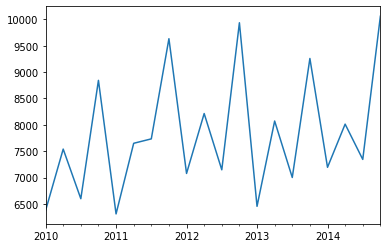

In [4]:
ols_data['JK3']['2010':'2014'].plot()

plt.show()

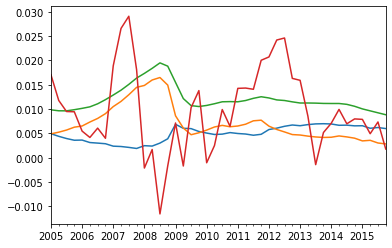

In [5]:
ols_data['S']['2005':'2015'].plot()
ols_data['RNOK']['2005':'2015'].plot()
ols_data['REN100']['2005':'2015'].plot()
(0.02+ols_data['RRT']['2005':'2015']).plot()
#ols_data['KURVECU']['1990':'1999'].plot()
#ols_data['OLJEPRIS']['1990':'1999'].plot()
plt.show()


In [8]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

jk = ols_data['JK3'].fillna(method="ffill")

res_jk = sm.tsa.seasonal_decompose(jk)
res_jks15 = sm.tsa.seasonal_decompose(ols_data['JKS15'].fillna(method='ffill'))
res_jks25 = sm.tsa.seasonal_decompose(ols_data['JKS25'].fillna(method='ffill'))
res_jks30 = sm.tsa.seasonal_decompose(ols_data['JKS30'].fillna(method='ffill'))
res_jks45 = sm.tsa.seasonal_decompose(ols_data['JKS45'].fillna(method = 'ffill'))
res_x = sm.tsa.seasonal_decompose(ols_data['X3'].fillna(method='ffill'))


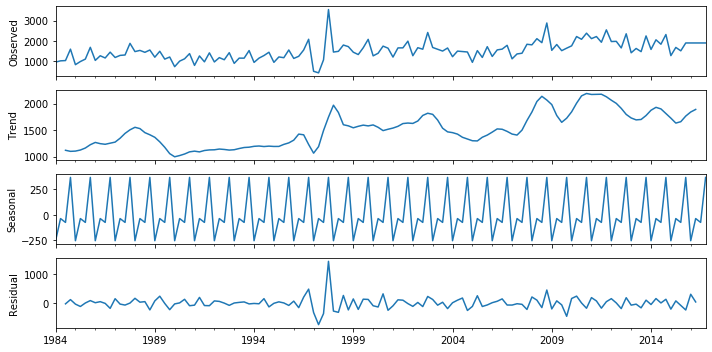

In [9]:
fig = res_jks15.plot()
fig.set_size_inches(10, 5)
plt.tight_layout()

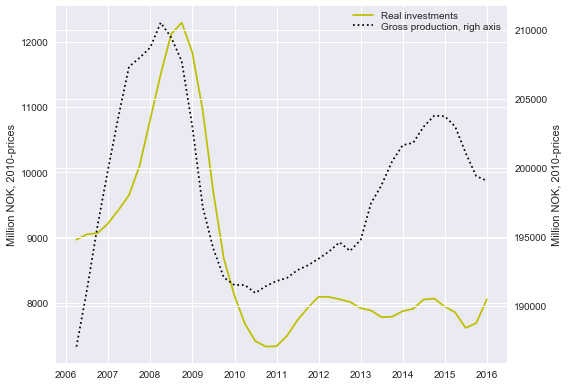

In [65]:
plt.style.use('seaborn')
# plt.style.use('default')

fig, ax1 = plt.subplots()

data = res_jk.trend['2006':'2015']
tid = pd.date_range('1/1/2006', periods=40,  freq='Q')
        
ax1.plot(tid, data, 'y')    
# ax1.plot = plt.plot(res.jk15.trend['2006':'2015'], label='Investments, trend')
# ax1.set_xlabel('Investments, trend')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Million NOK, 2010-prices')  
ax1.tick_params('y')
ax1.legend(['Real investments'], bbox_to_anchor=(0.65,0.95), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fancybox=False)

ax2 = ax1.twinx()
data2 = res_x.trend['2006':'2015']
ax2.plot(tid,data2, 'k:')
# ax2.tick_params('y', color='c')
ax2.set_ylabel('Million NOK, 2010-prices')
ax2.legend(['Gross production, righ axis'], bbox_to_anchor=(0.65, 0.92), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fancybox=False)


# plt.ylabel('Million NOK in 2010-prices')
# plt.legend( fancybox=False )    
# plt.savefig('Figures/investFig.png', bbox_inches = "tight" )
# plt.show()
# C:\Users\i235jbp\Dropbox\PhD\Agginvest\Python
# plt.legend()
fig.tight_layout()
plt.savefig('Figures/investFig.png', bbox_inches = "tight" )
plt.show()

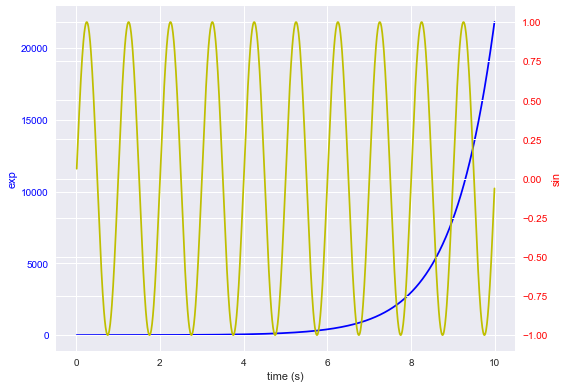

In [17]:
import numpy as np
fig, ax1 = plt.subplots()
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('exp', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = np.sin(2 * np.pi * t)
ax2.plot(t, s2, 'y')
ax2.set_ylabel('sin', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

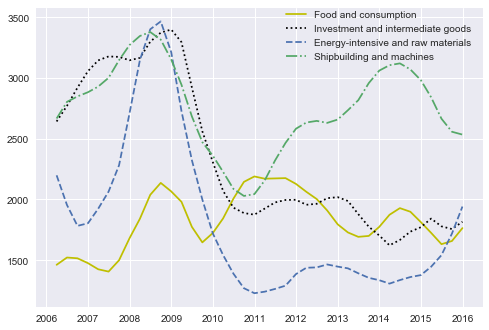

In [63]:
data1 = res_jks15.trend['2006':'2015']
data2 = res_jks25.trend['2006':'2015']
data3 = res_jks30.trend['2006':'2015']
data4 = res_jks45.trend['2006':'2015']

fig, ax1 = plt.subplots()
tid = pd.date_range('1/1/2006', periods=40,  freq='Q')
        
ax1.plot(tid, data1, 'y')  


# ax2 = ax1.twinx()
ax1.plot(tid, data2,'k:')
ax1.plot(tid, data3, '--')
ax1.plot(tid, data4, '-.')
ax1.legend(['Food and consumption', 'Investment and intermediate goods', 'Energy-intensive and raw materials','Shipbuilding and machines' ],
           bbox_to_anchor=(0.55, 1.005), loc=2,
           ncol=1, mode="expand", borderaxespad=0., fancybox=False)

# jks15, = plt.plot(res.jks15.trend['2006':'2015'],label = 'Food and consumption, trend' )
# jks25, = plt.plot(res.jks25.trend['2006':'2015'],label = 'Investment and intermediate goods, trend' )
# jks30, = plt.plot(res.jks30.trend['2006':'2015'],label = 'Energy-intensive and raw materials, trend' )
# jks45, = plt.plot(res.jks45.trend['2006':'2015'],label = 'Shipbuilding and machines, trend' )
# plt.ylabel('Million NOK in 2010-prices')
# plt.legend(bbox_to_anchor=(0., -0.4
#                            , 1.0, 0.25), loc=4,
#            ncol=1, mode="expand", borderaxespad=0., fancybox=False )    
plt.savefig('Figures/investFigDetail.png', bbox_inches = "tight" )
plt.show()
